c:\Users\Ziven\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


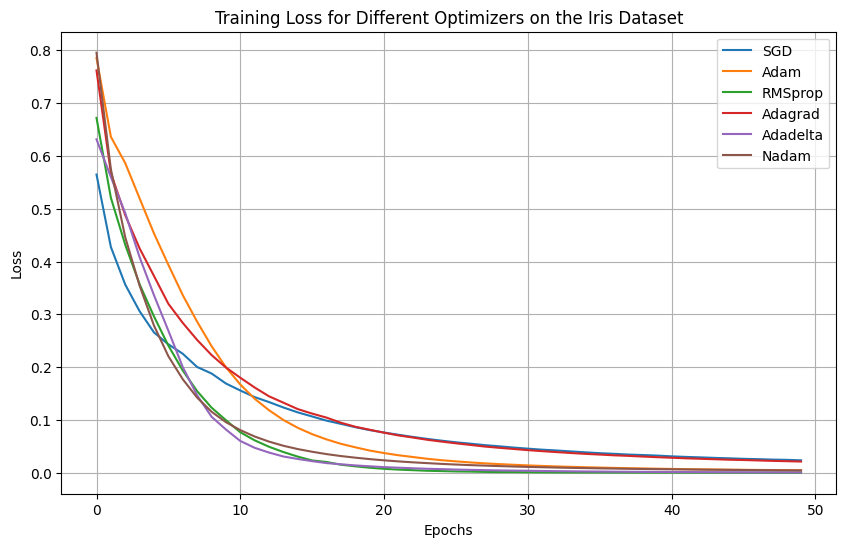

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - loss: 0.0033
Final Test Accuracy: 100.00%


In [16]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Extract features (X) and labels (y)
X = iris.data  # features (sepal length, sepal width, petals length, petals width)
y = iris.target  # target labels (0=Setosa, 1=Versicolor, 2=Virginica)

# Convert the problem into a binary classification (Setosa vs Versicolor) 
X_binary = X[y != 2] 
y_binary = y[y != 2] 

# One-hot encode the target labels 
lb = LabelBinarizer() 
y_binary = lb.fit_transform(y_binary) 

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42) 

# Define a function to create a simple model 
def create_model(optimizer): 
    model = Sequential() 
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification 
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers to try 
optimizers = [ 
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.001), 
    RMSprop(learning_rate=0.001), 
    Adagrad(learning_rate=0.01), 
    Adadelta(learning_rate=1.0),
    Nadam(learning_rate=0.001) 
]

# List to store the training loss for each optimizer
optimizer_names = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam']
history_dict = {}

for optimizer in optimizers:
    model = create_model(optimizer)
    print(f"Training with {optimizer.__class__.__name__}...")
    
    # Train the model and store the history
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)  # Use training data
    
    # Store the loss history for plotting
    history_dict[optimizer.__class__.__name__] = history.history['loss']

# Plotting the loss for each optimizer
plt.figure(figsize=(10, 6))

for optimizer_name, loss in history_dict.items():
    plt.plot(loss, label=optimizer_name)

plt.title('Training Loss for Different Optimizers on the Iris Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model with the best optimizer (based on training loss) 
best_optimizer = Adam(learning_rate=0.001)  # You can choose the best 
best_model = create_model(best_optimizer)
best_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)  # Use training data

# Evaluate the final model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")